In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm
import matplotlib as mpl
mpl.rc('animation', html='jshtml')
#plt.style.use(['science','notebook'])

# Tutorial

The purpose of this tutorial is to

* Show how to use the implict central method to solve Laplace's equation in 2D
* To show how to make surface plots in python
* To show how to make animated GIFs in python

Consider the boundary conditions of the following 2D potential $V(x,y)$ in the square $x \in [-a, a]$ and $y \in [-a, a]$

* $V(x, a) = V_0 \cos (\frac{\pi}{2}\frac{x}{a})$
* $V(x, -a) = V_0 (\frac{x}{a})^4$
* $V(a, y) = V_0 \frac{1}{e^{-1}-e}(e^{x/a}-e)$
* $V(-a, y) = \frac{1}{2}((x/a)^2+(x/a))$

Use the implicit central method to find the potential $V(x,y)$ in the square and make a surface plot

## Answer

There are four edges to the square in question. First we create an array of 100 points which we will use to contruct the potential at the edges. 

In [2]:
edge = np.linspace(-1, 1, 100)

Now we create 1D arrays of the potential at each edge. They are constructed in order of how they are defined in the problem

In [13]:
upper_y = np.cos(np.pi * edge / 2)
lower_y = edge**4
upper_x = 1/(np.e**-1 - np.e) * (np.exp(edge)-np.e)
lower_x = 0.5 * (edge**2-edge)

We can plot the potential at each edge in a 1D plot

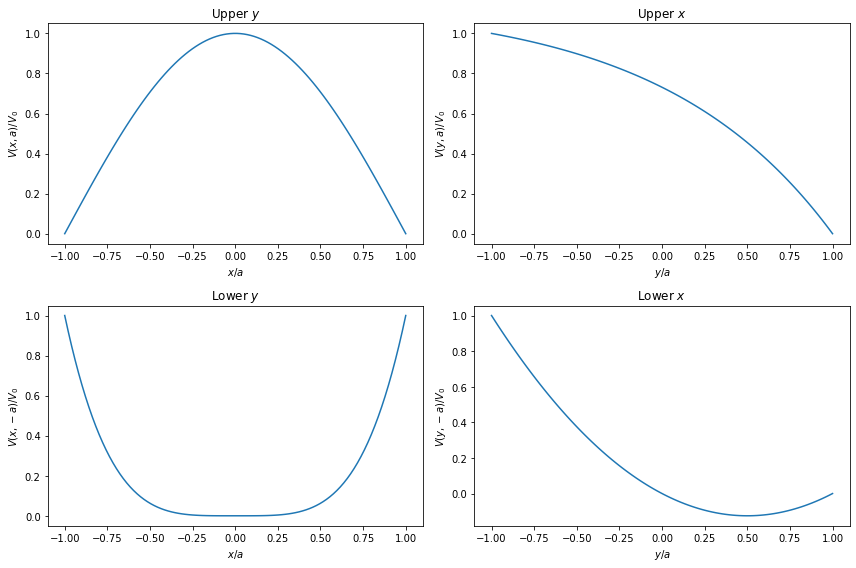

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))

ax[0,0].set_xlabel('$x/a$')
ax[0,0].set_ylabel('$V(x,a)/V_0$')
ax[0,0].set_title('Upper $y$')
ax[0,0].plot(edge, upper_y)

ax[1,0].set_xlabel('$x/a$')
ax[1,0].set_ylabel('$V(x,-a)/V_0$')
ax[1,0].set_title('Lower $y$')
ax[1,0].plot(edge, lower_y)

ax[0,1].set_xlabel('$y/a$')
ax[0,1].set_ylabel('$V(y,a)/V_0$')
ax[0,1].set_title('Upper $x$')
ax[0,1].plot(edge, upper_x)

ax[1,1].set_xlabel('$y/a$')
ax[1,1].set_ylabel('$V(y,-a)/V_0$')
ax[1,1].set_title('Lower $x$')
ax[1,1].plot(edge, lower_x)

fig.tight_layout()

We eventually need to solve for the potential **everywhere** in the square. To do this, we will create a 2D meshgrid of the square.

In [15]:
xv, yv = np.meshgrid(edge, edge)

Now we get into the implicit central method. First we create a 100x100 2D array which we will use for the potential. We initialize all values to zero.

In [16]:
potential = np.zeros((100,100))

Then we define the potential at the edges using numpy's slicing features. After the code below is run, All the edges of the box will be defined with the right potential.

In [17]:
potential[0,:]= lower_y
potential[-1,:]= upper_y
potential[:,0]= lower_x
potential[:,-1]= upper_x

Below is the implicit central method. We now need to fill in the inner part of the 2D array. To do this, we use

$$V(x_i, y_j) = \frac{1}{4}(V(x_{i+1}, y_{j}) + V(x_{i-1}, y_{j}) + V(x_{i}, y_{j+1}) + V(x_{i}, y_{j-1})) $$

We do this for all values of $i$ and $j$. That procedure is considered to be 1 iteration. If we do this for many iterations, the potential is guarenteed to converge to the true potential given by $\nabla^2 V = 0$ with the appropriate boundary conditions. Here we do it for 10000 iterations.

In [18]:
n_iter = 10000
for n in range(n_iter):
    for i in range(1, len(edge)-1):
        for j in range(1, len(edge)-1):
            potential[i,j] = 1/4 * (potential[i+1, j] + potential[i-1, j] + potential[i, j+1] + potential[i, j-1])

Now create an animated gif of what the potential looks like. Animation in python is slightly complicated. Note that we have two functions defined

* `init()`: This function is called at the beginning of the animation and is only called once. It sets up the plot with all appropriate labels.
* `animate()`: animate takes in one argument: the frame of the animation which we call `i`. It then alters the figure using the parameter `i`.

Below these two functions we use matplotlib's animation function. We pass in the names of the two function defined above. We set it to 180 frames total (don't worry about the `interval` argument for now). Finally, when the animation is saved, we specify the frames per second (fps) of the animation.

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


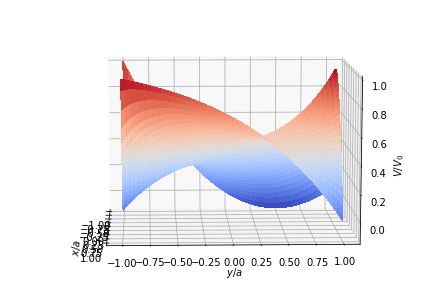

In [19]:
fig = plt.figure()
ax = Axes3D(fig)

def init():
    # Plot the surface.
    ax.plot_surface(xv, yv, potential, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    ax.set_xlabel('$x/a$')
    ax.set_ylabel('$y/a$')
    ax.set_zlabel('$V/V_0$')
    return fig,

def animate(i):
    # azimuth angle : 0 deg to 360 deg
    ax.view_init(elev=10, azim=i*2)
    return fig,

# Animate
ani = animation.FuncAnimation(fig, animate, init_func=init, repeat=False,
                               frames=180, interval=50)
fn = 'rotate_azimuth_angle_3d_surf'
ani.save(fn+'.gif',writer='imagemagick',fps=20)

# Assignment

Perhaps a simpler version of the problem above where they have to solve it by hand using sep. of variables. Then they find the solution using

(i) Using sep. of variables get a summation of terms. Then numerically plot the surface using the sum of the terms <br>
(ii) Use the method discussed in the tutorial.

Show methods (i) and (ii) are equal.